Need to mount the drive to acess the dataset since the dataset is large.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5869 sha256=d3b9538121c829868184164c112e2b8b7cbd9cf297652e42dc6c5dcdc7e34302
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [3]:
!pip install lime shap scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 27.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=603fca2449d40007695f3a9040aac046b204f80fb7884c657e961fe9b09faeaa
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


###Imports and Load data

In [4]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa
from tempfile import TemporaryFile
from sklearn.preprocessing import normalize

import os
import math
import pickle
import random
import operator


import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Additional libraries for data preprocessing and visualization
import cv2
from sklearn.model_selection import train_test_split


In [5]:
import os
Root = "/content/drive/MyDrive/Data"
os.chdir(Root)

In [6]:
audio_data_path = "/content/drive/MyDrive/Data/genres_original"
music_data = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")
music_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [7]:
music_data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

### EDA

In [8]:
import librosa.display
import librosa
from importlib import reload
plt=reload(plt)

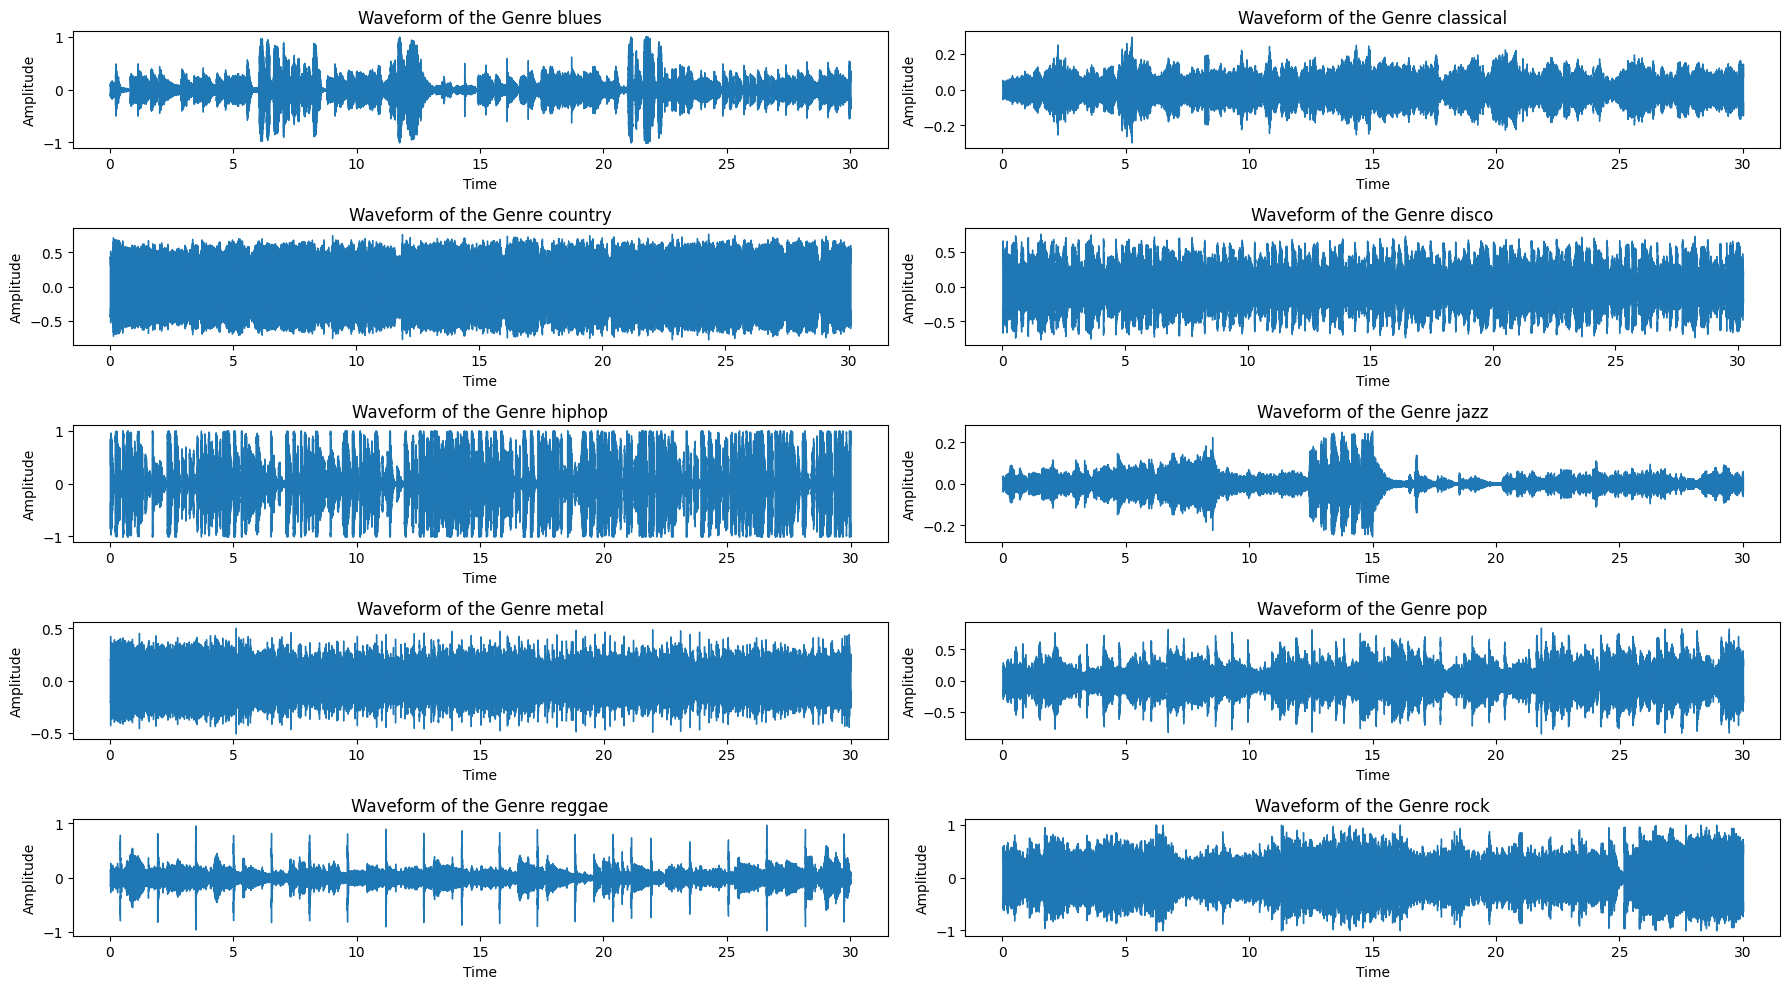

In [9]:
base_path = '/content/drive/MyDrive/Data/genres_original/'

# List of genre folders
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Create a figure for plotting
plt.figure(figsize=(18, 10))

# Loop through each genre and plot the waveform
for i, genre in enumerate(genres):
    # Get the list of audio files in the genre folder
    genre_folder = os.path.join(base_path, genre)
    audio_files = os.listdir(genre_folder)

    # Plot the first audio file in the genre
    path = os.path.join(genre_folder, audio_files[0])

    plt.subplot(5, 2, i + 1)
    x, sr = librosa.load(path)
    librosa.display.waveshow(x, sr=sr)

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform of the Genre {genre}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


### Heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

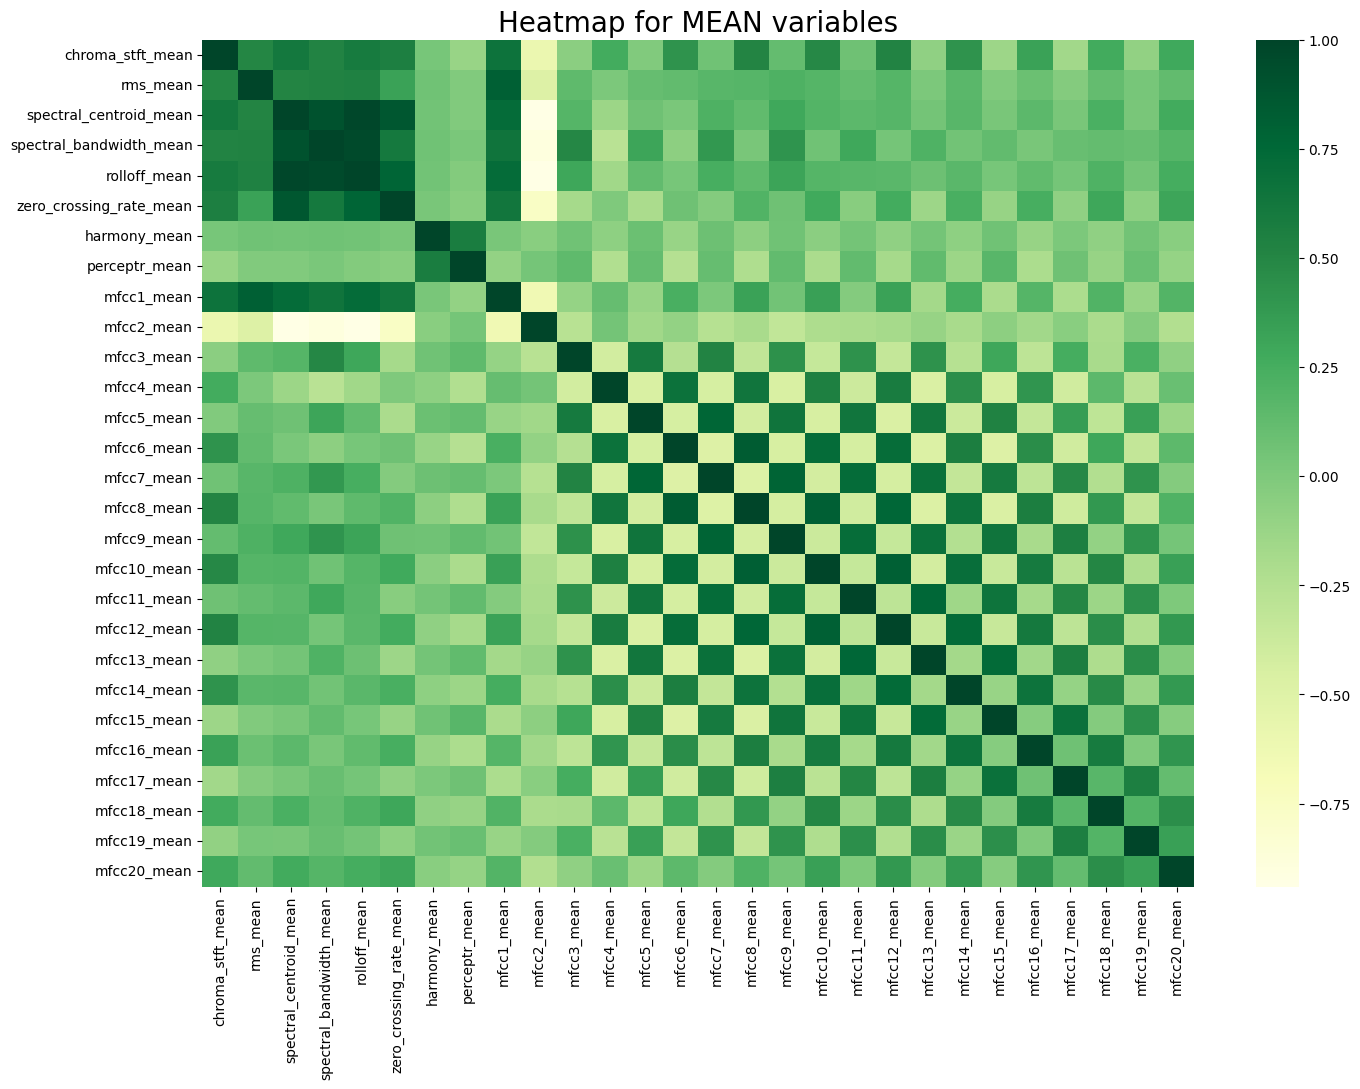

In [10]:
# Computing the Correlation Matrix
spike_cols = [col for col in music_data.columns if 'mean' in col]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

### Spectrogram

<ipython-input-11-23de64095492>:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')


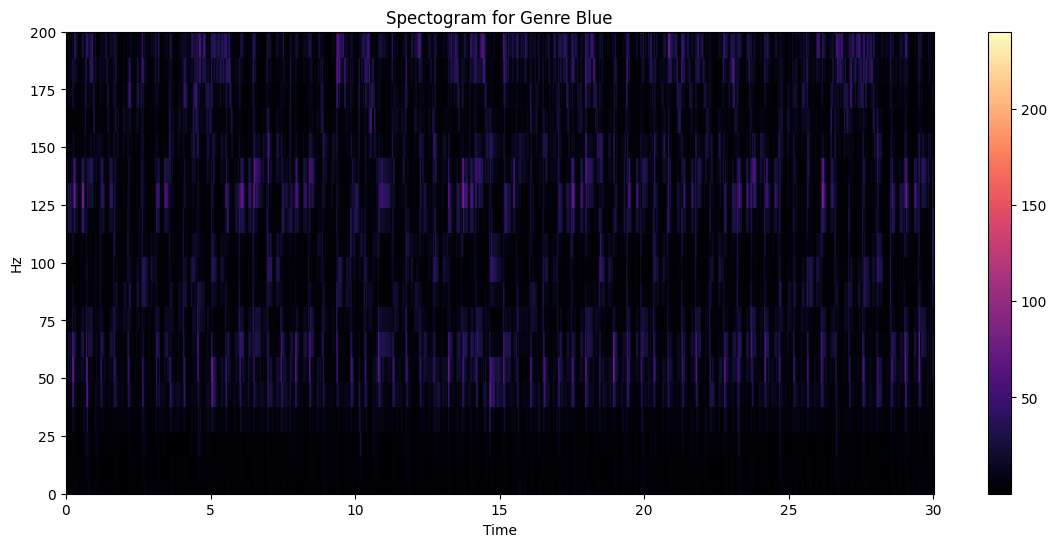

In [11]:
data, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav')
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize =(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.ylim(0, 200)
plt.title('Spectogram for Genre Blue')
plt.colorbar()

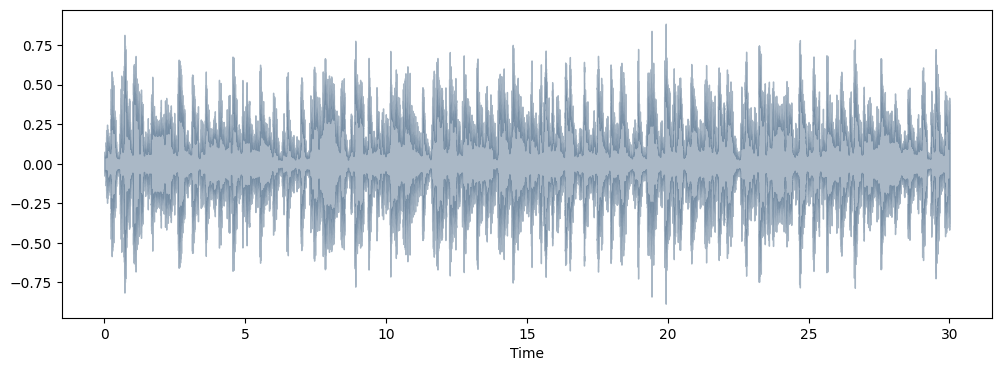

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(y = data, sr=sr)[0]
plt.figure(figsize = (12, 4))
librosa.display.waveshow(data, sr=sr, alpha = 0.4, color = "#2B4F72")

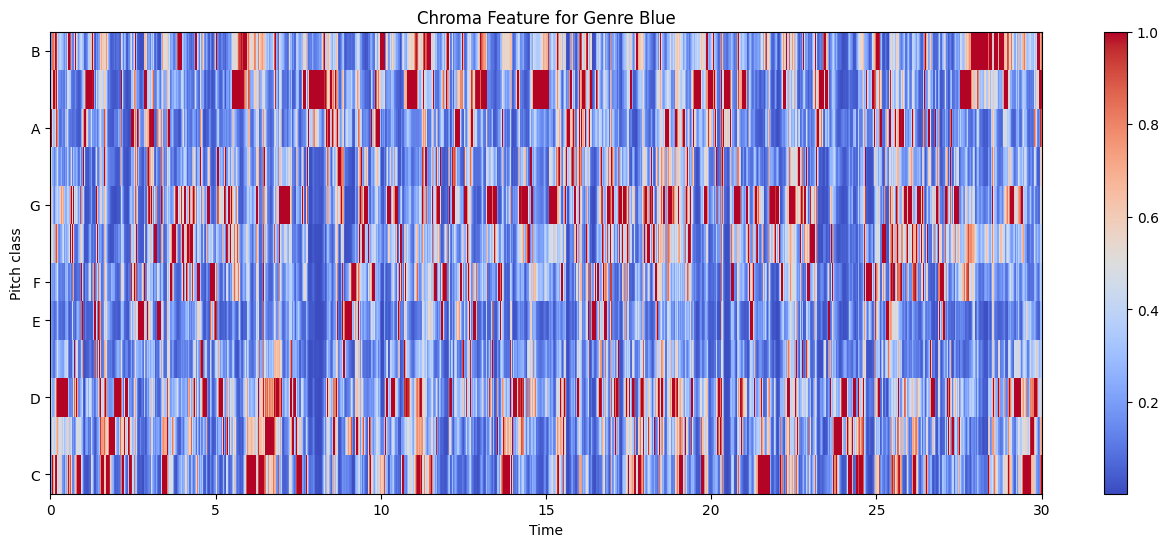

In [13]:
chroma = librosa.feature.chroma_stft(y = data, sr = sr)
plt.figure(figsize = (16,6))
librosa.display.specshow(chroma, sr = sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Feature for Genre Blue')
plt.show()

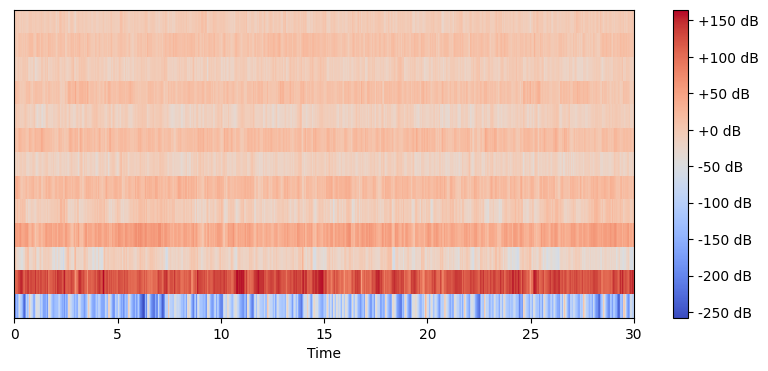

In [14]:
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show()

### KNN

*Define a function to get the distance between feature vectors and find neighbors:*

In [15]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

Identify the nearest neighbors:

In [16]:
def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1
        else:
            classVote[response]=1

    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

Define a function for model evaluation:

In [17]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

Extract features from the dataset and dump these features into a binary .dat file “my.dat”:

In [18]:
directory = audio_data_path
f = open("mydataset.dat", "wb")
i = 0
for folder in os.listdir(directory):
    #print(folder)
    i += 1
    if i == 11:
        break
    for file in os.listdir(directory+"/"+folder):
        #print(file)
        try:
            (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
            mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix, covariance, i)
            pickle.dump(feature, f)
        except Exception as e:
            print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
f.close()

Got an exception:  File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported. in folder:  jazz  filename:  jazz.00054.wav


Train and test split on the dataset:

In [19]:
dataset = []

def loadDataset(filename, split, trset, teset):
    with open('mydataset.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trset.append(dataset[x])
        else:
            teset.append(dataset[x])

trainingSet = []
testSet = []
loadDataset(music_data, 0.68, trainingSet, testSet)

In [20]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

Make prediction using KNN and get the accuracy on test data:

In [21]:
# Make the prediction using KNN(K nearest Neighbors)
length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestClass(getNeighbors(trainingSet, testSet[x], 5)))

accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)

0.7063953488372093


Testing

In [22]:
from collections import defaultdict
results = defaultdict(int)

directory = audio_data_path
i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1


pred = nearestClass(getNeighbors(dataset, feature, 5))
print(results[pred])

rock


### Random Forest Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

data = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
scaled_df = pd.DataFrame(np_scaled, columns = cols)
scaled_df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [24]:
# Assuming X contains your features and y contains the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208
   classical       0.94      0.99      0.96       203
     country       0.80      0.84      0.82       186
       disco       0.85      0.83      0.84       199
      hiphop       0.91      0.89      0.90       218
        jazz       0.86      0.93      0.89       192
       metal       0.87      0.96      0.91       204
         pop       0.92      0.96      0.94       180
      reggae       0.91      0.87      0.89       211
        rock       0.90      0.72      0.80       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



In [25]:
# HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Print best model parameters
print("Best Random Forest Model Parameters:")
print(best_params)

# Print feature importances if available
if hasattr(best_rf_model, 'feature_importances_'):
    feature_importances = dict(zip(X_train.columns, best_rf_model.feature_importances_))
    print("\nFeature Importances:")
    print(pd.Series(feature_importances).sort_values(ascending=False))

# Print accuracy on the training set
train_predictions = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("\nTraining Accuracy:", train_accuracy)

# Print accuracy on the test set
test_predictions = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Best Random Forest Model Parameters:
{'max_depth': 20, 'n_estimators': 200}

Feature Importances:
perceptr_var               0.050251
rms_var                    0.036729
chroma_stft_mean           0.035061
rms_mean                   0.033170
mfcc4_mean                 0.032416
spectral_bandwidth_mean    0.031033
mfcc1_mean                 0.027288
perceptr_mean              0.026472
rolloff_mean               0.026276
rolloff_var                0.025494
harmony_var                0.024902
spectral_centroid_mean     0.024076
mfcc1_var                  0.023775
spectral_centroid_var      0.022042
mfcc9_mean                 0.021423
mfcc6_mean                 0.021038
zero_crossing_rate_mean    0.020062
harmony_mean               0.019521
mfcc8_mean                 0.019422
mfcc3_mean                 0.019246
mfcc5_var                  0.018240
chroma_stft_var            0.018209
mfcc3_var                  0.017896
mfcc2_mean                 0.017124
mfcc11_mean                0.016926
mf

Lime and Shap

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer
import shap

data = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']
cols = X.columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate models
knn_predictions = knn_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

print(f'KNN Accuracy: {accuracy_score(y_test, knn_predictions):.2f}')
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.2f}')

# LIME for KNN
knn_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=y.unique())
knn_exp = knn_explainer.explain_instance(X_test.iloc[0].values, knn_model.predict_proba)

# LIME for Random Forest
rf_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=y.unique())
rf_exp = rf_explainer.explain_instance(X_test.iloc[0].values, rf_model.predict_proba)


KNN Accuracy: 0.27
Random Forest Accuracy: 0.88


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


## UI

In [34]:
!pip install -q streamlit

### App

In [35]:
%%writefile App.py

import streamlit as st
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa
from collections import defaultdict
from tempfile import TemporaryFile
from sklearn.preprocessing import normalize
from scipy.spatial import distance
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

import os
import math
import pickle
import random
import operator
import base64
import requests


import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Additional libraries for data preprocessing and visualization
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


st.set_page_config(page_title='MusicMapping', layout="wide")
st.title('Music Genere Classification')

st.sidebar.image('https://editor.analyticsvidhya.com/uploads/94476Music%20Genre%20Classification%20Project.png')
st.sidebar.write('Developed by ')
st.sidebar.write('V K Deeksha - 21PD37')
st.sidebar.write('M Aiswarya - 21PD20')


# Create tabs
tab1, tab2, tab3, tab4, tab5 = st.tabs(["Overview and Data","📈 Visualize","KNN-Model","RandomForest_Model","Prediction"])

Root = "/content/drive/MyDrive/Data"
os.chdir(Root)
audio_data_path = "/content/drive/MyDrive/Data/genres_original"

with tab1:
    st.header("Overview")
    st.markdown("Certainly! A music genre classification project involves building a system that can automatically categorize music tracks into predefined genres based on their audio features. This type of project is often approached using machine learning techniques, where the model learns patterns and characteristics of different genres from a labeled dataset.")
    st.markdown('---')
    st.markdown('GTZAN MUSIC dataset is a vast collection of audio music files.')
    music_data = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")
    st.write("GTZAN Dataset:")
    st.write(music_data)


with tab2:
    st.header("Visualization")

    st.subheader("Waveform of every Genere")
    from importlib import reload
    plt=reload(plt)
    base_path = '/content/drive/MyDrive/Data/genres_original/'
    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    plt.figure(figsize=(18, 10))
    for i, genre in enumerate(genres):
        # Get the list of audio files in the genre folder
        genre_folder = os.path.join(base_path, genre)
        audio_files = os.listdir(genre_folder)

        # Plot the first audio file in the genre
        path = os.path.join(genre_folder, audio_files[0])

        plt.subplot(5, 2, i + 1)
        x, sr = librosa.load(path)
        librosa.display.waveshow(x, sr=sr)

        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.title(f'Waveform of the Genre {genre}')

    plt.tight_layout()
    st.pyplot(plt)

    st.subheader("Heatmap")
    spike_cols = [col for col in music_data.columns if 'mean' in col]
    fig, ax = plt.subplots(figsize=(16, 11))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn', ax=ax)
    plt.title('Heatmap for MEAN variables', fontsize=20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    st.pyplot(fig)

    st.subheader("Genre Spectrogram Viewer")
    genres_path = '/content/drive/MyDrive/Data/genres_original/'
    genres = os.listdir(genres_path)
    selected_genre = st.selectbox('Select Genre', genres)
    audio_path = os.path.join(genres_path, selected_genre, f'{selected_genre}.00000.wav')
    data, sr = librosa.load(audio_path)
    stft = librosa.stft(data)
    stft_db = librosa.amplitude_to_db(abs(stft))
    # Display the spectrogram using Matplotlib
    plt.figure(figsize=(14, 6))
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
    plt.ylim(0, 200)
    plt.title(f'Spectrogram for Genre {selected_genre.capitalize()}')
    plt.colorbar()
    st.pyplot(plt)

    st.subheader("MFCC Visualization")
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    # Display the MFCCs using Matplotlib
    fig, ax = plt.subplots(figsize=(10, 4))
    img = librosa.display.specshow(mfccs, x_axis='time', sr=sr, ax=ax)
    fig.colorbar(img, format='%+2.0f dB')
    # Display the plot using Streamlit
    st.pyplot(fig)

with tab3:
    st.header("KNN Model and Lime Explanations")
    def getNeighbors(trainingSet, instance, k):
        distances = []
        for x in range (len(trainingSet)):
            dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
            distances.append((trainingSet[x][2], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(k):
            neighbors.append(distances[x][0])
        return neighbors

    def nearestClass(neighbors):
        classVote = {}

        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in classVote:
                classVote[response]+=1
            else:
                classVote[response]=1

        sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
        return sorter[0][0]

    def getAccuracy(testSet, predictions):
        correct = 0
        for x in range (len(testSet)):
            if testSet[x][-1]==predictions[x]:
                correct+=1
        return 1.0*correct/len(testSet)

    directory = audio_data_path
    f = open("mydataset.dat", "wb")
    i = 0
    for folder in os.listdir(directory):
        #print(folder)
        i += 1
        if i == 11:
            break
        for file in os.listdir(directory+"/"+folder):
            #print(file)
            try:
                (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
                mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
                covariance = np.cov(np.matrix.transpose(mfcc_feat))
                mean_matrix = mfcc_feat.mean(0)
                feature = (mean_matrix, covariance, i)
                pickle.dump(feature, f)
            except Exception as e:
                print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
    f.close()

    dataset = []

    def loadDataset(filename, split, trset, teset):
        with open('mydataset.dat','rb') as f:
            while True:
                try:
                    dataset.append(pickle.load(f))
                except EOFError:
                    f.close()
                    break
        for x in range(len(dataset)):
            if random.random() < split:
                trset.append(dataset[x])
            else:
                teset.append(dataset[x])

    trainingSet = []
    testSet = []
    loadDataset(music_data, 0.68, trainingSet, testSet)

    def distance(instance1, instance2, k):
        distance = 0
        mm1 = instance1[0]
        cm1 = instance1[1]
        mm2 = instance2[0]
        cm2 = instance2[1]
        distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
        distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
        distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
        distance -= k
        return distance

    # Make the prediction using KNN(K nearest Neighbors)
    length = len(testSet)
    predictions = []
    for x in range(length):
        predictions.append(nearestClass(getNeighbors(trainingSet, testSet[x], 5)))
    accuracy = getAccuracy(testSet, predictions)
    st.write(f"Accuracy of the KNN Model: {accuracy:.2%}")

    # Lime Explanations
    st.subheader("Lime Explanations")
    data = pd.read_csv('/content/drive/MyDrive/Data/features_30_sec.csv')
    data = data.iloc[0:, 1:]
    y = data['label']
    X = data.loc[:, data.columns != 'label']
    cols = X.columns

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train KNN model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    st.write("Lime Explanation:")
    knn_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=y.unique())
    knn_exp = knn_explainer.explain_instance(X_test.iloc[0].values, knn_model.predict_proba)
    st.write(knn_exp)

with tab4:
    st.header("RandomForest Model")
    data = pd.read_csv('/content/drive/MyDrive/Data/features_30_sec.csv')
    data = data.iloc[0:, 1:]
    y = data['label']
    X = data.loc[:, data.columns != 'label']
    cols = X.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(X)
    scaled_df = pd.DataFrame(np_scaled, columns = cols)
    st.write("Scaled Data:")
    st.write(scaled_df.head())
    X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    class_report = classification_report(y_test, y_pred)
    st.write("Classification Report:")
    st.write(class_report)
    st.subheader("After hyperparameter Tuning:")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
    }
    rf_model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_rf_model = RandomForestClassifier(**best_params, random_state=42)
    best_rf_model.fit(X_train, y_train)
    st.write("Best Random Forest Model Parameters:")
    st.write(best_params)
    if hasattr(best_rf_model, 'feature_importances_'):
        feature_importances = dict(zip(X_train.columns, best_rf_model.feature_importances_))
        st.write("Feature Importances:")
        st.write(pd.Series(feature_importances).sort_values(ascending=False))
    train_predictions = best_rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    st.write(f"Training Accuracy After predicting using the best model:{train_accuracy}")
    test_predictions = best_rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    st.write(f"Test Accuracy After predicting using the best model:{test_accuracy}")
    # Create a LIME explainer
    # LIME for Random Forest
    rf_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=y.unique())
    rf_exp = rf_explainer.explain_instance(X_test.iloc[0].values, best_rf_model.predict_proba)
    st.write("Lime Explanation:")
    st.write(rf_exp)

with tab5:
    st.header('Audio Genre Prediction')
    def getNeighbors(trainingSet, instance, k):
        distances = []
        for x in range (len(trainingSet)):
            dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
            distances.append((trainingSet[x][2], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(k):
            neighbors.append(distances[x][0])
        return neighbors

    def nearestClass(neighbors):
        classVote = {}

        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in classVote:
                classVote[response]+=1
            else:
                classVote[response]=1

        sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
        return sorter[0][0]

    def getAccuracy(testSet, predictions):
        correct = 0
        for x in range (len(testSet)):
            if testSet[x][-1]==predictions[x]:
                correct+=1
        return 1.0*correct/len(testSet)

    directory = audio_data_path
    f = open("mydataset.dat", "wb")
    i = 0
    for folder in os.listdir(directory):
        #print(folder)
        i += 1
        if i == 11:
            break
        for file in os.listdir(directory+"/"+folder):
            #print(file)
            try:
                (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
                mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
                covariance = np.cov(np.matrix.transpose(mfcc_feat))
                mean_matrix = mfcc_feat.mean(0)
                feature = (mean_matrix, covariance, i)
                pickle.dump(feature, f)
            except Exception as e:
                print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
    f.close()

    dataset = []

    def loadDataset(filename, split, trset, teset):
        with open('mydataset.dat','rb') as f:
            while True:
                try:
                    dataset.append(pickle.load(f))
                except EOFError:
                    f.close()
                    break
        for x in range(len(dataset)):
            if random.random() < split:
                trset.append(dataset[x])
            else:
                teset.append(dataset[x])

    trainingSet = []
    testSet = []
    loadDataset(music_data, 0.68, trainingSet, testSet)

    def distance(instance1, instance2, k):
        distance = 0
        mm1 = instance1[0]
        cm1 = instance1[1]
        mm2 = instance2[0]
        cm2 = instance2[1]
        distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
        distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
        distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
        distance -= k
        return distance

    # Make the prediction using KNN(K nearest Neighbors)
    length = len(testSet)
    predictions = []
    for x in range(length):
        predictions.append(nearestClass(getNeighbors(trainingSet, testSet[x], 5)))

    def predict_genre(audio_file):
      results = defaultdict(int)
      directory = audio_data_path
      i = 1
      for folder in os.listdir(directory):
          results[i] = folder
          i += 1
      pred = nearestClass(getNeighbors(dataset, feature, 5))
      return (results[pred])

    uploaded_file = st.file_uploader("Upload an audio file", type=['mp3', 'wav'])
    if uploaded_file:
        st.audio(uploaded_file)
        prediction = predict_genre(uploaded_file)
        st.write(f"Predicted Genre: {prediction}")

Overwriting App.py


### Run

In [33]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/drive/MyDrive/Data/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/drive/MyDrive/Data/package.json'
npm WARN Data No description
npm WARN Data No repository field.
npm WARN Data No README data
npm WARN Data No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.584s

3 packages are looking for funding
  run `npm fund` for details

found 5 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [36]:
!streamlit run App.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.106.170.63


In [37]:
!npx localtunnel --port 8501

npx: installed 22 in 6.274s
your url is: https://fancy-corners-juggle.loca.lt
^C
